In [28]:
# Multiple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [40]:
# Importing the dataset
dataset = pd.read_csv('Movie_data - Sheet1.csv')
# dataset['gross']=dataset['gross'].fillna(dataset['gross'].mean())
dataset['duration']=dataset['duration'].fillna(dataset['duration'].mean())
dataset['budget']=dataset['budget'].fillna(dataset['budget'].mean())
# dataset['budget']=dataset['budget'].drop()
dataset=dataset[(dataset['gross']>0) & (dataset['movie_facebook_likes'] >0) & (dataset['budget'] >0)]

X = dataset.iloc[:, [2,12,14,16]]
y = dataset.iloc[:, 3]

dataset

,director_name,num_critic_for_reviews,duration,gross,genre-1,genre-2,genre-3,genre-4,genre-5,genre-6,genre-7,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,760505847.0,Action,Adventure,Fantasy,Sci-Fi,NaN,NaN,NaN,PG-13,2.370000e+08,2009.0,7.9,1.78,33000
2,Sam Mendes,602.0,148.0,200074175.0,Action,Adventure,Thriller,NaN,NaN,NaN,NaN,PG-13,2.450000e+08,2015.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,448130642.0,Action,Thriller,NaN,NaN,NaN,NaN,NaN,PG-13,2.500000e+08,2012.0,8.5,2.35,164000
5,Andrew Stanton,462.0,132.0,73058679.0,Action,Adventure,Sci-Fi,NaN,NaN,NaN,NaN,PG-13,2.637000e+08,2012.0,6.6,2.35,24000
7,Nathan Greno,324.0,100.0,200807262.0,Adventure,Animation,Comedy,Family,Fantasy,Musical,Romance,PG,2.600000e+08,2010.0,7.8,1.85,29000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,77.0,424760.0,Drama,Sci-Fi,Thriller,NaN,NaN,NaN,NaN,PG-13,7.000000e+03,2004.0,7.0,1.85,19000
5034,Neill Dela Llana,35.0,80.0,70071.0,Thriller,NaN,NaN,NaN,NaN,NaN,NaN,Not Rated,7.000000e+03,2005.0,6.3,NaN,74
5037,Edward Burns,14.0,95.0,4584.0,Comedy,Drama,NaN,NaN,NaN,NaN,NaN,Not Rated,9.000000e+03,2011.0,6.4,NaN,413
5041,Daniel Hsia,14.0,100.0,10443.0,Comedy,Drama,Romance,NaN,NaN,NaN,NaN,PG-13,3.975262e+07,2012.0,6.3,2.35,660


In [41]:
X

,duration,budget,imdb_score,movie_facebook_likes
0,178.0,2.370000e+08,7.9,33000
2,148.0,2.450000e+08,6.8,85000
3,164.0,2.500000e+08,8.5,164000
5,132.0,2.637000e+08,6.6,24000
7,100.0,2.600000e+08,7.8,29000
...,...,...,...,...
5033,77.0,7.000000e+03,7.0,19000
5034,80.0,7.000000e+03,6.3,74
5037,95.0,9.000000e+03,6.4,413
5041,100.0,3.975262e+07,6.3,660


In [42]:
y

0       760505847.0
2       200074175.0
3       448130642.0
5        73058679.0
7       200807262.0
           ...     
5033       424760.0
5034        70071.0
5037         4584.0
5041        10443.0
5042        85222.0
Name: gross, Length: 2266, dtype: float64

In [43]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([1.11503840e+08, 1.29047533e+08, 6.79078525e+07, 1.77050245e+07,
       5.54770753e+07, 1.96477513e+07, 3.31872469e+07, 5.74146777e+07,
       2.74486314e+07, 7.46303823e+07, 5.38595118e+07, 5.92657719e+07,
       5.90364742e+07, 2.25960434e+07, 5.03236914e+07, 3.03126124e+07,
       5.56303339e+07, 2.55172728e+07, 2.77592944e+07, 2.43093510e+07,
       4.08311076e+07, 4.15613832e+07, 3.59750692e+07, 5.25700448e+07,
       4.55474847e+07, 9.14590095e+07, 1.24968190e+08, 1.46658460e+07,
       2.91862799e+07, 6.08481722e+07, 5.14925710e+07, 4.36856373e+07,
       5.79838304e+07, 2.27590459e+07, 9.93364275e+07, 7.67621158e+07,
       5.25182530e+07, 1.98503074e+07, 5.20816089e+07, 9.94903453e+07,
       2.63614313e+07, 4.68409888e+07, 4.40811967e+07, 6.86158403e+07,
       4.07608654e+07, 5.22451263e+07, 5.60759794e+07, 1.24496937e+08,
       4.02896676e+07, 2.97485669e+07, 5.32945234e+07, 3.35929849e+07,
       2.60478432e+07, 8.36546595e+07, 4.11305533e+07, 5.22037734e+07,
      

In [44]:
X_test

,duration,budget,imdb_score,movie_facebook_likes
92,120.0,1.650000e+08,5.5,67000
1197,120.0,4.000000e+07,7.7,74000
2092,170.0,2.200000e+07,5.6,15000
1313,84.0,4.000000e+07,5.8,565
1393,106.0,3.600000e+07,7.8,17000
...,...,...,...,...
3981,113.0,3.000000e+07,6.9,29000
2734,145.0,6.000000e+06,8.3,12000
577,116.0,7.200000e+07,4.5,886
4598,98.0,3.975262e+07,6.9,43


In [45]:
print(regressor.intercept_)
print(regressor.coef_)

-43725187.31715146
[3.95003919e+05 9.43922286e-03 4.68855259e+06 1.20125441e+03]


In [82]:
y_test

92      102315545.0
1197     96917897.0
2092     59696176.0
1313      4777007.0
1393     12339633.0
           ...     
3981     61094903.0
2734        26435.0
577      32616869.0
4598        22434.0
4411      5132222.0
Name: gross, Length: 454, dtype: float64

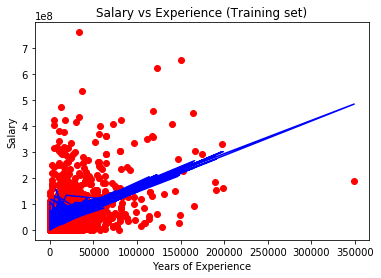

In [47]:
# Visualising the Training set results
plt.scatter(X_train['movie_facebook_likes'], y_train, color = 'red')
plt.plot(X_train['movie_facebook_likes'],regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

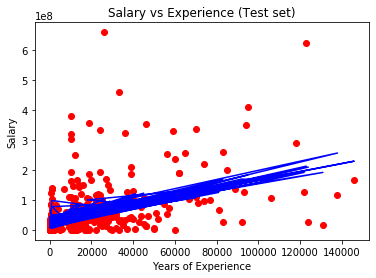

In [48]:
# Visualising the Test set results
plt.scatter(X_test['movie_facebook_likes'], y_test, color = 'red')
plt.plot(X_test['movie_facebook_likes'], regressor.predict(X_test), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [49]:
array=np.array([[121,230000000,5.5,70000],[120.0,4.000000e+07,7.7,74000]])
array

array([[1.21e+02, 2.30e+08, 5.50e+00, 7.00e+04],
       [1.20e+02, 4.00e+07, 7.70e+00, 7.40e+04]])

In [50]:
value=regressor.predict(array)
value

array([1.16116156e+08, 1.29047533e+08])

In [81]:
from sklearn.externals import joblib

In [62]:
joblib.dump(regressor,'Model.pkl')

['Model.pkl']

In [63]:
helo=open('Model.pkl','r')
helo

<_io.TextIOWrapper name='Model.pkl' mode='r' encoding='cp1252'>

In [64]:
temp={}
temp['duration']=121
temp['budget']=230000000
temp['imdb_score']=5.5
temp['movie_facebook_likes']=70000

In [71]:
testData=pd.DataFrame({'x' : temp}).transpose()

In [75]:
testData

,budget,duration,imdb_score,movie_facebook_likes
x,230000000.0,121.0,5.5,70000.0


In [80]:
modelReload=joblib.load('Model.pkl')
modelReload.predict(array)

array([1.16116156e+08, 1.29047533e+08])

In [77]:
regressor.predict(testData)[0]

90850967435745.86